## Data Analytics Project - US STATE CRIME (1960-2019)

Autors: Agnieszka Welian, Katarzyna Wątorska
<br>
Date: 14-06-2022

From the Unified Crime Reporting Statistics and under the collaboration of the U.S. Department of Justice and the Federal Bureau of Investigation information crime statistics are available for public review. The following data set has information on the crime rates and totals for states across the United States for a wide range of years. The crime reports are divided into two main categories: property and violent crime. Property crime refers to burglary, larceny, and motor related crime while violent crime refers to assault, murder, rape, and robbery. These reports go from 1960 to 2019.

The main goal of this project will be to take check the correlation between the 2 types of crimes: Burglary and Larceny for the California state.

Source: https://think.cs.vt.edu/corgis/csv/state_crime/ (which are logged data from FBI page)

# 1. Data preprocessing

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel
import scipy.stats as stats
import arviz as az
import matplotlib as mpl
plt.style.context('seaborn-white')
mpl.rcParams['figure.dpi'] = 200

In [131]:
df = pd.read_csv("state_crime.csv")
df.head()

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
0,Alabama,1960,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,...,27.5,33823,11626,19344,2853,6097,4512,406,281,898
1,Alabama,1961,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,...,19.1,32541,11205,18801,2535,5564,4255,427,252,630
2,Alabama,1962,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,...,22.5,35829,11722,21306,2801,5283,3995,316,218,754
3,Alabama,1963,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,10.2,...,24.7,38521,12614,22874,3033,6115,4755,340,192,828
4,Alabama,1964,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,9.3,...,29.1,46290,15898,26713,3679,7260,5555,316,397,992


In [132]:
df.columns

Index(['State', 'Year', 'Data.Population', 'Data.Rates.Property.All',
       'Data.Rates.Property.Burglary', 'Data.Rates.Property.Larceny',
       'Data.Rates.Property.Motor', 'Data.Rates.Violent.All',
       'Data.Rates.Violent.Assault', 'Data.Rates.Violent.Murder',
       'Data.Rates.Violent.Rape', 'Data.Rates.Violent.Robbery',
       'Data.Totals.Property.All', 'Data.Totals.Property.Burglary',
       'Data.Totals.Property.Larceny', 'Data.Totals.Property.Motor',
       'Data.Totals.Violent.All', 'Data.Totals.Violent.Assault',
       'Data.Totals.Violent.Murder', 'Data.Totals.Violent.Rape',
       'Data.Totals.Violent.Robbery'],
      dtype='object')

In [133]:
#isolating 1 state
california = df[df["State"] == "California"]

Text(0.5, 1.0, 'Data before shifting')

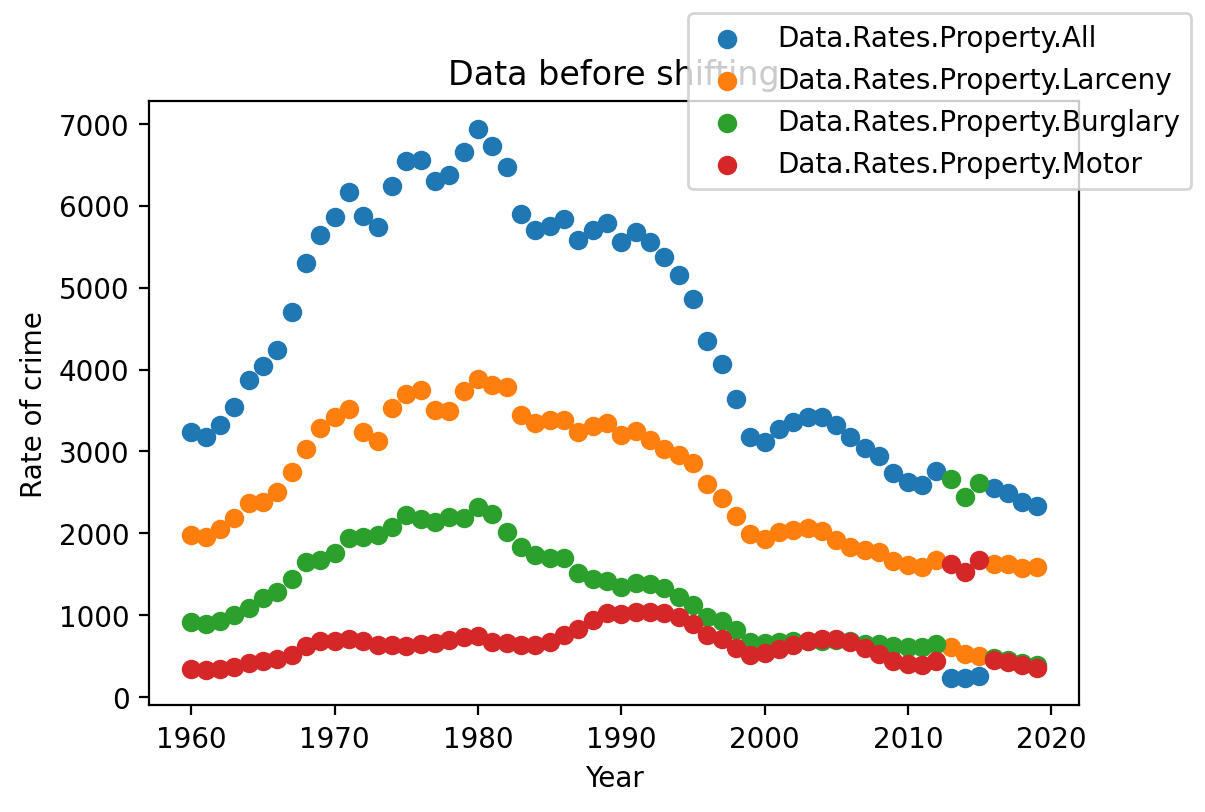

In [134]:
#sns.scatterplot(data=california, x = 'Year', y = 'Data.Population', hue = 'State')
fig,ax = plt.subplots()

# ax.scatter(data=california, x = 'Year', y = 'Data.Population')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.All')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Larceny')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Burglary')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Motor')
# ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.All')
# ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.Assault')
# ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.Murder')
# ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.Robbery')
# ax.scatter(data=california, x = 'Year', y = 'Data.Totals.Property.All')
# ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.Rape')
fig.legend()
plt.xlabel('Year')
plt.ylabel('Rate of crime')
plt.title("Data before shifting")

For the data that we plan to use there is a visible replacement in variables between the columns. After verifying data in csv with the FBI data, the result was that our hipotesis was correct - data was shifted, so we decided to shift the data between above columns.

In [135]:
for i in range(0, len(df)):
    if df['Data.Rates.Property.All'][i] <  df['Data.Rates.Property.Burglary'][i]:
        x = df['Data.Rates.Property.All'][i]
        df['Data.Rates.Property.All'][i] =  df['Data.Rates.Property.Burglary'][i]
        df['Data.Rates.Property.Burglary'][i] = x
    if df['Data.Rates.Property.Larceny'][i] <  df['Data.Rates.Property.Motor'][i]:
        y = df['Data.Rates.Property.Larceny'][i]
        df['Data.Rates.Property.Larceny'][i] =  df['Data.Rates.Property.Motor'][i]
        df['Data.Rates.Property.Motor'][i] = y
    if df['Data.Rates.Property.Burglary'][i] <  df['Data.Rates.Property.Motor'][i]:
        z = df['Data.Rates.Property.Burglary'][i]
        df['Data.Rates.Property.Burglary'][i] =  df['Data.Rates.Property.Motor'][i]
        df['Data.Rates.Property.Motor'][i] = z

C:\Users\Agnieszka\AppData\Local\Temp\ipykernel_10604\3816569277.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Data.Rates.Property.All'][i] =  df['Data.Rates.Property.Burglary'][i]
C:\Users\Agnieszka\AppData\Local\Temp\ipykernel_10604\3816569277.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Data.Rates.Property.Burglary'][i] = x
C:\Users\Agnieszka\AppData\Local\Temp\ipykernel_10604\3816569277.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

Text(0.5, 1.0, 'Data after shifting')

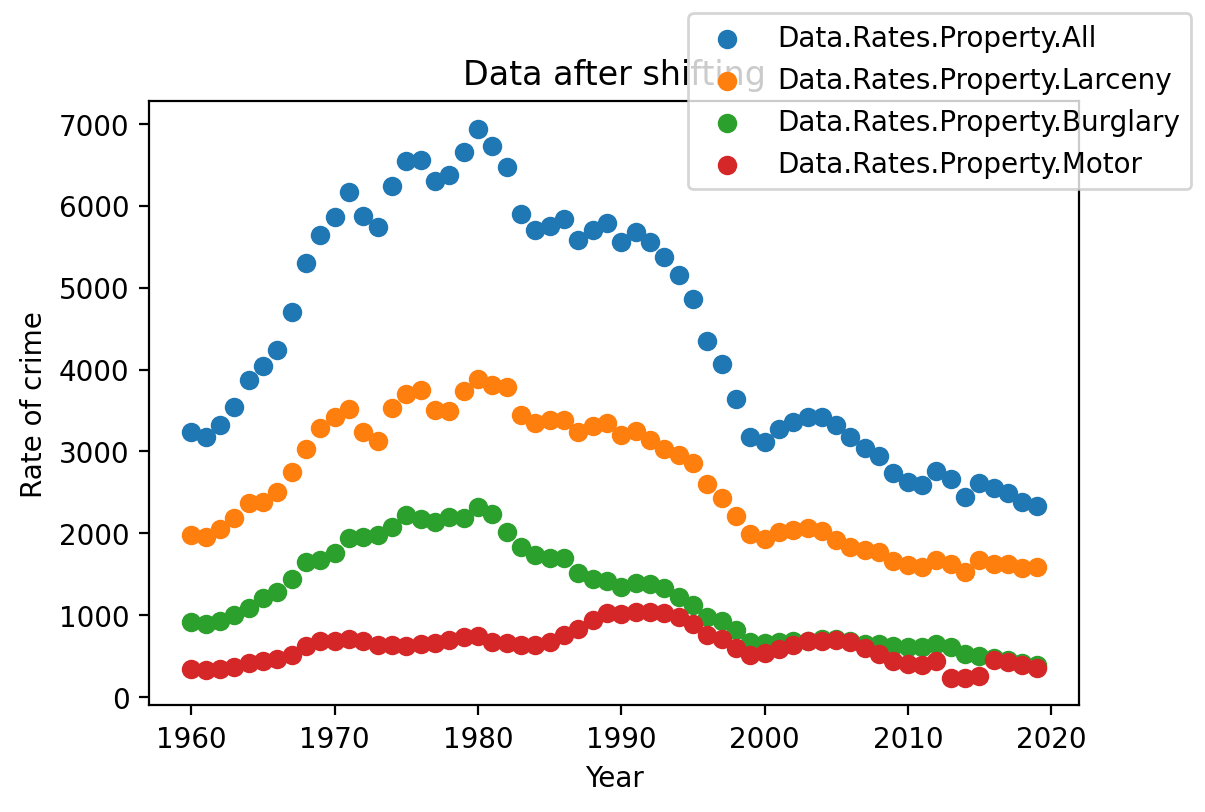

In [136]:
california = df[df["State"] == "California"]
fig,ax = plt.subplots()

ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.All')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Larceny')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Burglary')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Motor')
fig.legend()
plt.xlabel('Year')
plt.ylabel('Rate of crime')
plt.title("Data after shifting")

In [137]:
california.describe()

,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,Data.Rates.Violent.Rape,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
count,60.000000,6.000000e+01,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000,6.000000e+01,6.000000e+01,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000
mean,1989.500000,2.855579e+07,4475.756667,1228.918333,2620.975000,616.905000,617.291667,339.663333,7.89000,34.218333,224.545000,1.163731e+06,3.580828e+05,691070.750000,201472.483333,178274.266667,99361.366667,2207.50000,9654.166667,62802.366667
std,17.464249,7.628299e+06,1478.502570,594.524257,778.947315,207.456626,242.850555,152.225295,3.11365,10.450099,104.734474,4.012412e+05,1.865597e+05,203269.217232,119409.517507,79088.695892,51175.017672,870.82368,3161.458981,30578.344402
min,1960.000000,1.571720e+07,2331.200000,386.100000,1527.400000,232.300000,232.700000,119.600000,3.70000,17.400000,19.500000,8.902900e+04,1.431020e+05,197404.000000,53453.000000,37558.000000,18796.000000,605.00000,2859.000000,7464.000000
25%,1974.750000,2.111550e+07,3177.725000,674.300000,1922.125000,443.275000,440.800000,241.225000,4.87500,25.300000,147.475000,9.858202e+05,2.317542e+05,620181.750000,139242.500000,136046.000000,53445.500000,1744.25000,8280.000000,48528.250000
50%,1989.500000,2.941151e+07,4294.700000,1164.950000,2555.650000,635.600000,572.700000,319.050000,6.85000,34.150000,198.450000,1.185550e+06,3.209860e+05,695103.000000,168435.500000,180857.000000,99075.500000,2188.50000,9872.500000,62310.000000
75%,2004.250000,3.592007e+07,5760.975000,1708.150000,3346.200000,696.875000,801.500000,410.650000,10.60000,41.650000,311.450000,1.492620e+06,4.356690e+05,859776.750000,241611.000000,210350.250000,136183.250000,2772.25000,11997.750000,84399.500000
max,2019.000000,3.955704e+07,6939.500000,2316.500000,3880.000000,1038.900000,1119.700000,641.600000,14.50000,58.200000,424.100000,1.726391e+06,1.024914e+06,986120.000000,656517.000000,345624.000000,198045.000000,4096.00000,15505.000000,130897.000000


In [138]:
california['Data.Rates.Property.Burglary'].describe()


count      60.000000
mean     1228.918333
std       594.524257
min       386.100000
25%       674.300000
50%      1164.950000
75%      1708.150000
max      2316.500000
Name: Data.Rates.Property.Burglary, dtype: float64

In [139]:
california['Data.Rates.Property.Larceny'].describe()

count      60.000000
mean     2620.975000
std       778.947315
min      1527.400000
25%      1922.125000
50%      2555.650000
75%      3346.200000
max      3880.000000
Name: Data.Rates.Property.Larceny, dtype: float64

# Normal model - Prior predictive check

An attempt to fit Normal(µ, σ) distribution to burglary rate in California.

Research provided the information that mean of the burglary rate is approximately equal to 1300 and the standard deviation of the burglary rate is approximately equal to 600. Taking that into account, the following prior model was created:

In [140]:
with open('normal_ppc.stan', 'r') as file:
    print(file.read())

generated quantities {
  real mu = normal_rng(1300, 600);  //1300 - mean based on research, 600 - std based on research
  real <lower = 0> sigma = exponential_rng(0.005); //uncertainty is 200, 1/0.005 = 200
  real burglary = normal_rng(mu, sigma);
}


In [141]:
normal_model1 = CmdStanModel(stan_file = 'normal_ppc.stan')

R = 1000 
sim_normal = normal_model1.sample(iter_sampling = R, 
                             iter_warmup = 0,
                             chains = 1,
                             fixed_param = True,
                             seed = 31052022)

mu_normal_ppc = sim_normal.stan_variable('mu')
sigma_normal_ppc = sim_normal.stan_variable('sigma')
burglary_normal_ppc = sim_normal.stan_variable('burglary')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


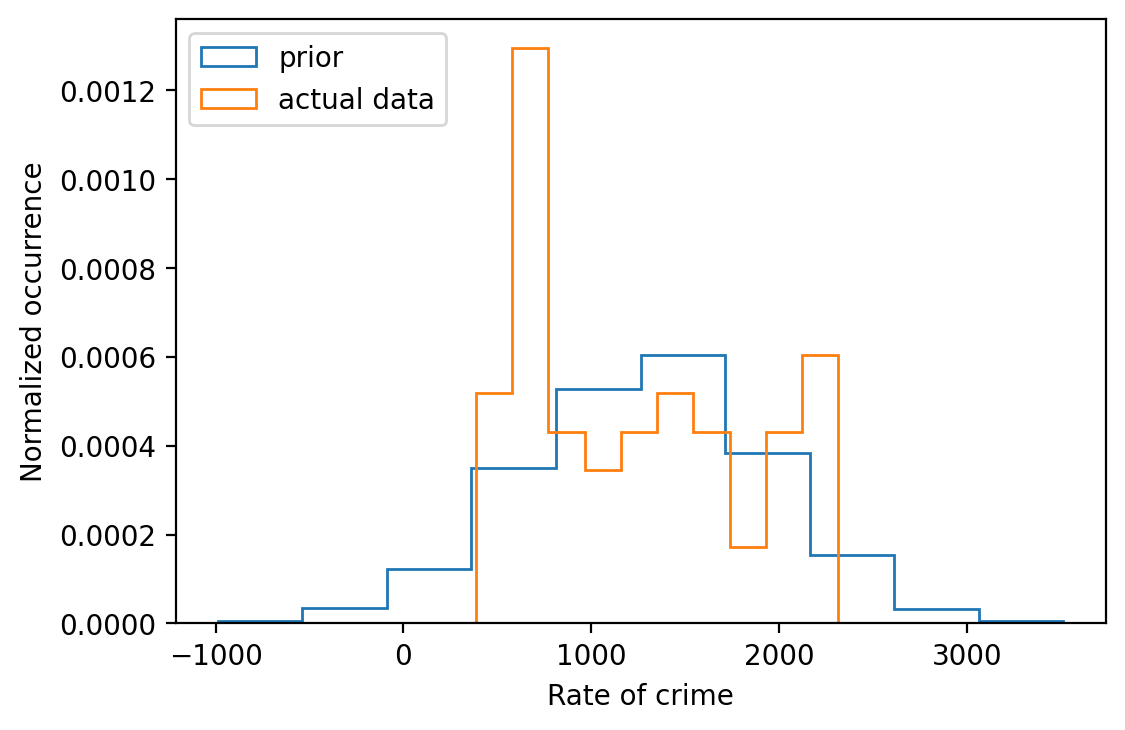

In [142]:
# prior.hist(column = 'Data.Rates.Property.Larceny', bins = 20)
# np.histogram(prior, bins = 20)
plt.hist(burglary_normal_ppc, bins=10, label= "prior", histtype='step', density = True)
plt.hist(california['Data.Rates.Property.Burglary'], bins=10, label= "actual data", histtype='step', density = True)
plt.legend(loc="upper left")
plt.xlabel('Rate of crime')
plt.ylabel('Normalized occurrence')
plt.show()

Text(0, 0.5, 'Normalized occurrence')

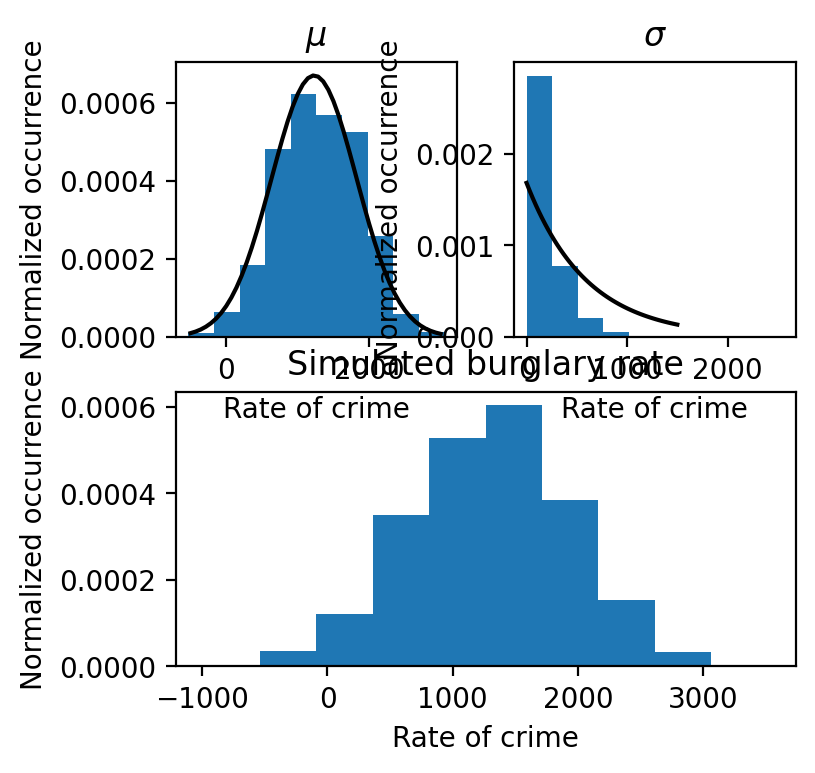

In [143]:
fig = plt.figure(figsize = (4, 4))
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[1, :])
ax1.hist(burglary_normal_ppc, bins = 10, density = True)
ax1.set_title('Simulated burglary rate')
plt.xlabel('Rate of crime')
plt.ylabel('Normalized occurrence')

ax2 = fig.add_subplot(gs[0, 0])
ax2.hist(mu_normal_ppc, bins = 10, density = True)
x = np.linspace(-500, 3000)
y = stats.norm.pdf(x, loc = 1229, scale = 595)
ax2.plot(x, y, 'black')
ax2.set_title('$\mu$')
plt.xlabel('Rate of crime')
plt.ylabel('Normalized occurrence')

ax3 = fig.add_subplot(gs[0, 1])
ax3.hist(sigma_normal_ppc, bins = 10, density = True)
x = np.linspace(0, 1500)
y = stats.expon.pdf(x, scale = 595)
ax3.plot(x, y, color = 'black')
ax3.set_title('$\sigma$')
plt.xlabel('Rate of crime')
plt.ylabel('Normalized occurrence')

# Normal model - Posterior and inference

In [144]:
with open('normal_fit.stan', 'r') as file:
    print(file.read())

data {
    int N;
    real burglaries [N];
}

parameters {
   real mu;
   real <lower = 0> sigma;
}

model {
    mu ~ normal(1300, 600);
    sigma ~ exponential(0.005);
    burglaries ~ normal(mu, sigma);
}

generated quantities {
    vector[N] log_lik;
    array [N] real burglary;
    for (j in 1:N)
    {
        burglary[j] = normal_rng(mu, sigma);
        log_lik[j] = normal_lpdf(burglaries[j] | mu, sigma);
    }
}


In [145]:
normal_fit = CmdStanModel(stan_file = 'normal_fit.stan')
stan_data={"N": len(california), "burglaries": california['Data.Rates.Property.Burglary']}

R = 1000 #bc the data has been collected for 60 years
sim_normal_fit = normal_model1.sample(iter_sampling = R, #długośc łańcucha Markova
                             iter_warmup = 1000, #ile przed tym zużyć sampli 
                             chains = 4,
                             fixed_param = False, #by przyspieszyc obliczenie gdy nie ma sekcji model w modelu
                             seed = 31052022)
mu_normal_fit = sim_normal_fit.stan_variable('mu')
sigma_normal_fit = sim_normal_fit.stan_variable('sigma')
burglary_normal_fit = sim_normal_fit.stan_variable('burglary')

INFO:cmdstanpy:compiling stan file C:\Users\Agnieszka\Desktop\drive\normal_fit.stan to exe file C:\Users\Agnieszka\Desktop\drive\normal_fit.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Agnieszka\Desktop\drive\normal_fit.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/Agnieszka/Desktop/drive/normal_fit.hpp C:/Users/Agnieszka/Desktop/drive/normal_fit.stan
Warning in 'C:/Users/Agnieszka/Desktop/drive/normal_fit.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -m64 -D_REENTRANT -Wall -Wno-unused-function -Wno-uninitialized -Wno-unused-but-set-variable -Wno-unused-variable -Wno-sign-compare -Wno-unused-local-typedefs -Wno-int-in-bool-context -Wno-attributes -Wno-ignored-attributes    


INFO:cmdstanpy:CmdStan done processing.


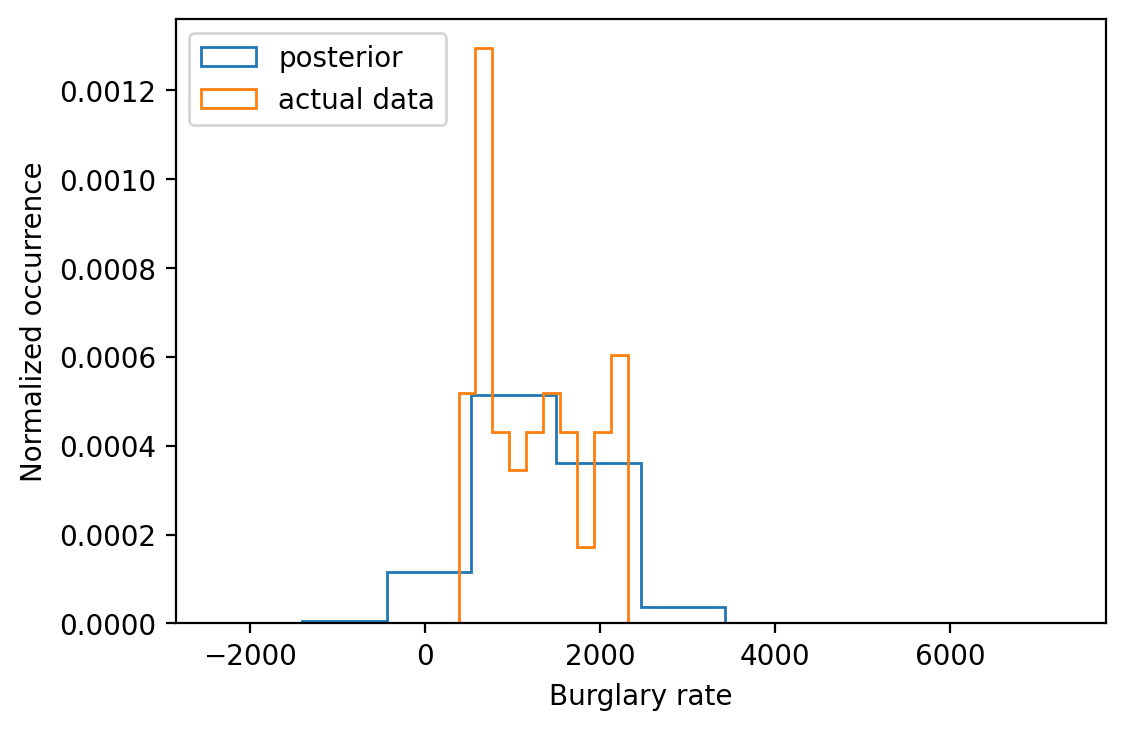

In [146]:
plt.hist(burglary_normal_fit, bins=10, label= "posterior", histtype='step', density = True)
plt.hist(california['Data.Rates.Property.Burglary'], bins=10, label= "actual data", histtype='step', density = True)
plt.legend(loc="upper left")
plt.xlabel('Burglary rate')
plt.ylabel('Normalized occurrence')
plt.show()

Text(0, 0.5, 'Normalized occurrence')

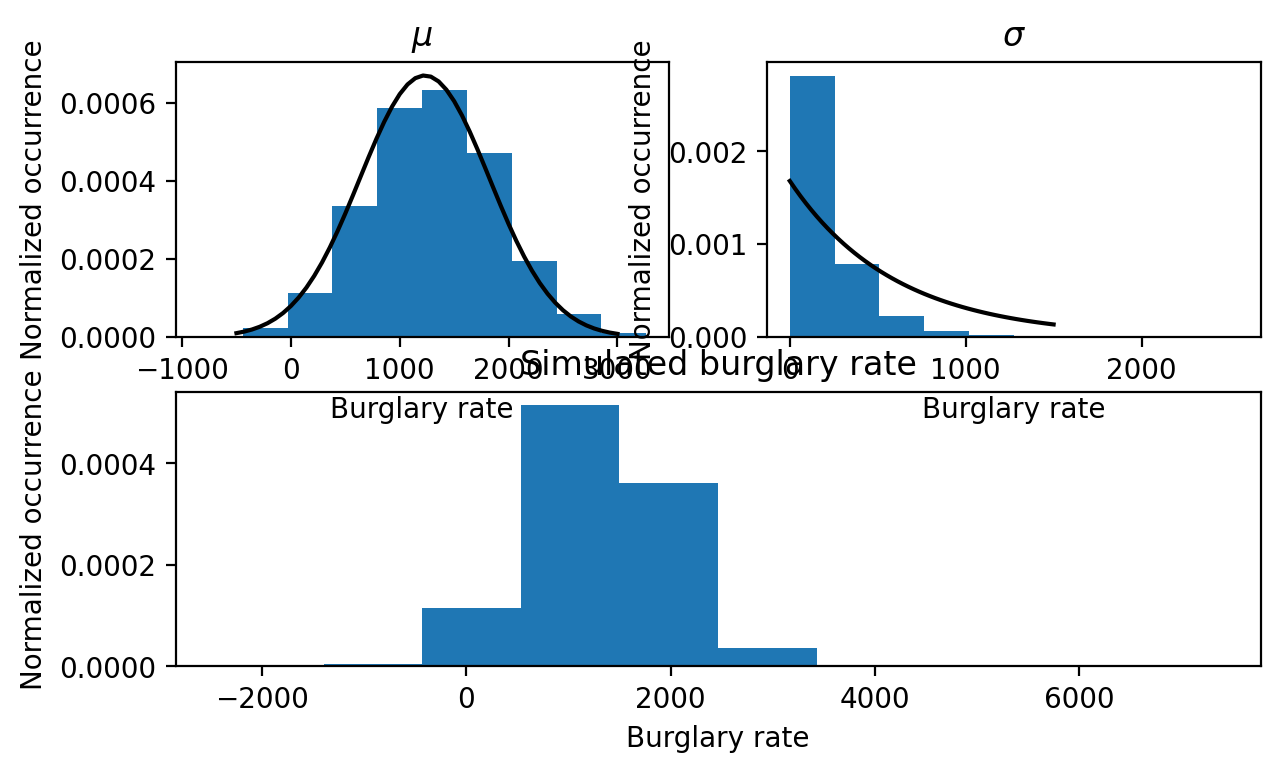

In [147]:
fig = plt.figure(figsize = (7, 4))
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[1, :])
ax1.hist(burglary_normal_fit, bins = 10, density = True)
ax1.set_title('Simulated burglary rate')
plt.xlabel('Burglary rate')
plt.ylabel('Normalized occurrence')

ax2 = fig.add_subplot(gs[0, 0])
ax2.hist(mu_normal_fit, bins = 10, density = True)
x = np.linspace(-500, 3000)
y = stats.norm.pdf(x, loc = 1229, scale = 595)
ax2.plot(x, y, 'black')
ax2.set_title('$\mu$')
plt.xlabel('Burglary rate')
plt.ylabel('Normalized occurrence')

ax3 = fig.add_subplot(gs[0, 1])
ax3.hist(sigma_normal_fit, bins = 10, density = True)
x = np.linspace(0, 1500)
y = stats.expon.pdf(x, scale = 595)
ax3.plot(x, y, color = 'black')
ax3.set_title('$\sigma$')
plt.xlabel('Burglary rate')
plt.ylabel('Normalized occurrence')

# TEN WYKRES TRZEBA POPRAWIĆ CYTUJĘ: "O jakie wy brzydkie wykresy robicie"

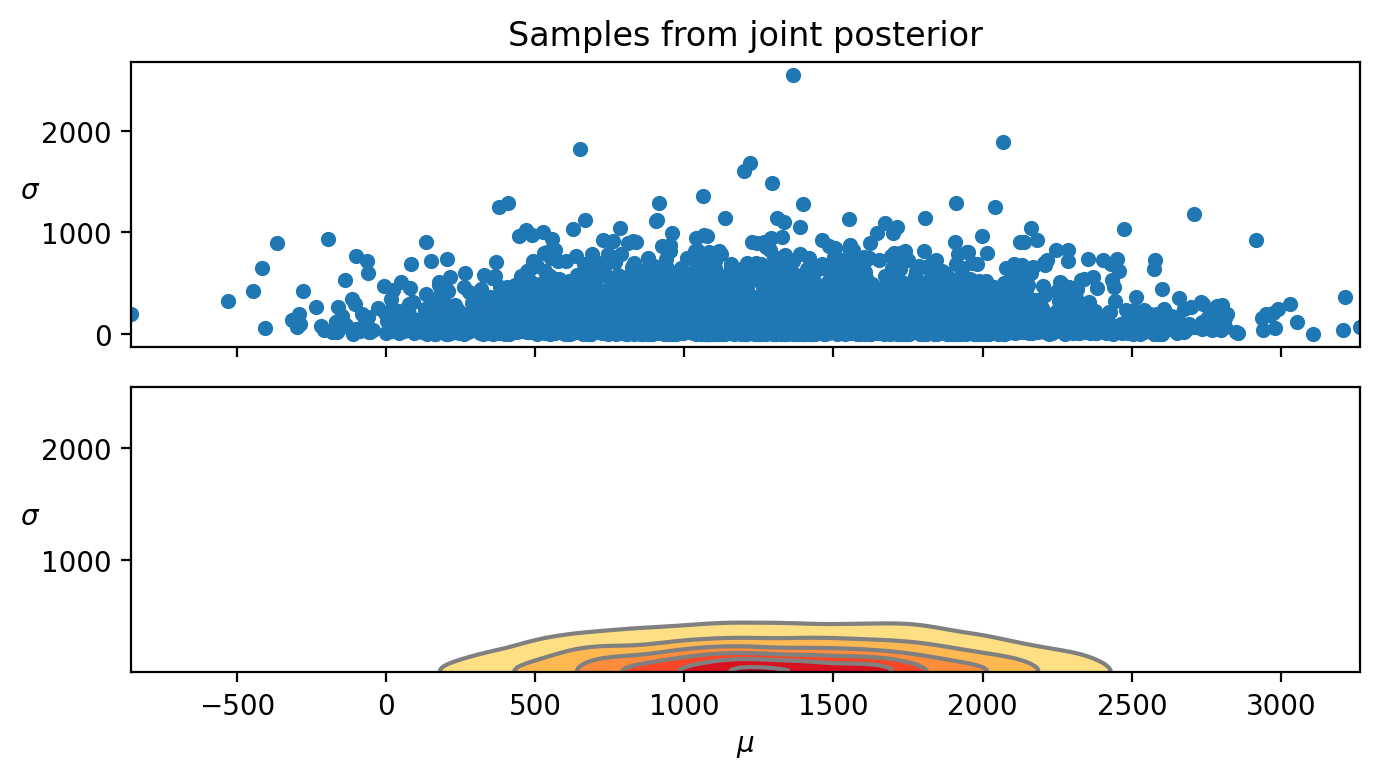

In [148]:


fig, axes = plt.subplots(2,1, figsize = (7,4), sharex = True)
ax1 = axes[0]
ax1.scatter(mu_normal_fit, sigma_normal_fit, 20)
ax1.set_ylabel(r'$\sigma$', rotation = 0)
ax1.set_title('Samples from joint posterior')

ax2 = axes[1]
az.plot_kde(mu_normal_fit, sigma_normal_fit, ax = ax2, contourf_kwargs = {'cmap': 'YlOrRd'})
fig.tight_layout()
ax2.set_ylabel(r'$\sigma$', rotation = 0)
ax2.set_xlabel(r'$\mu$')
fig.tight_layout()

plt.show()

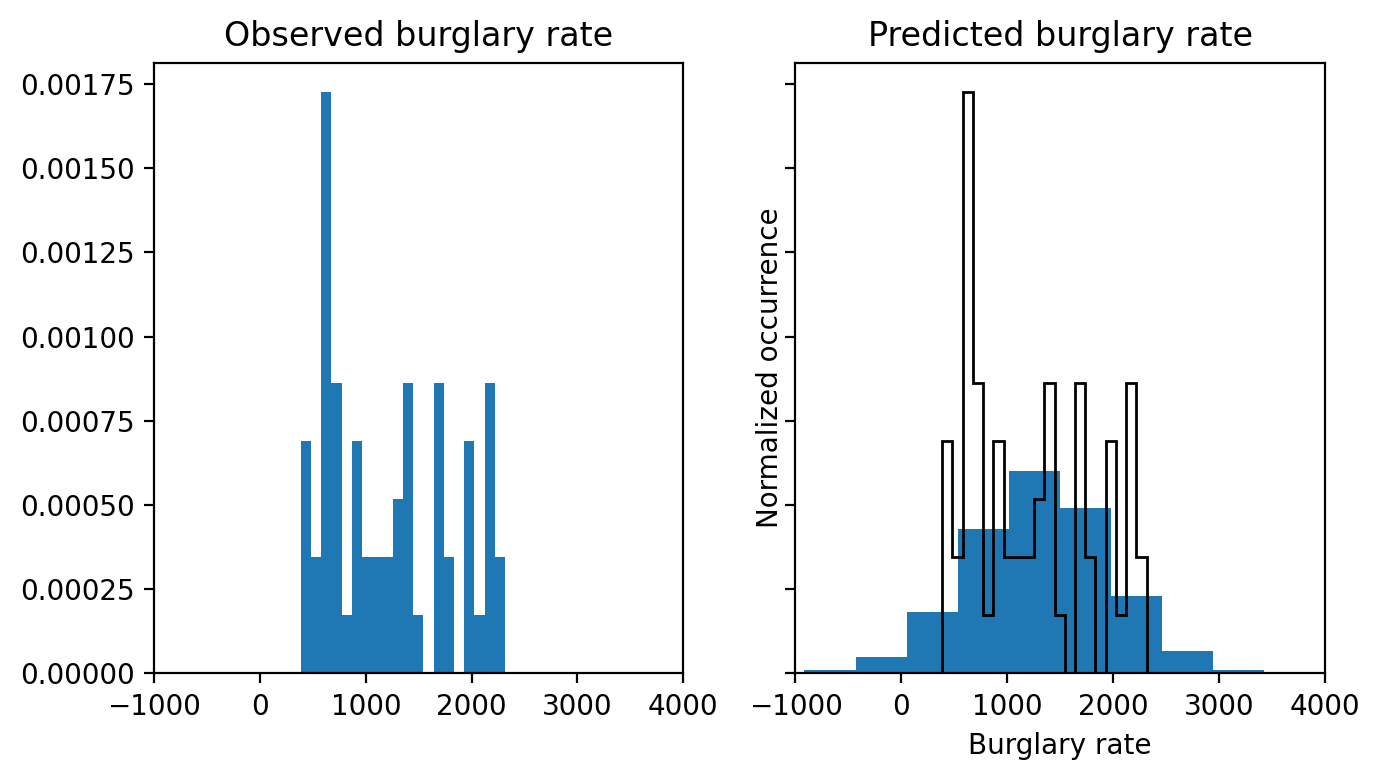

In [149]:
fig, axes = plt.subplots(1, 2, figsize = (7, 4), sharex = True, sharey = True)
ax = axes[0]
ax.hist(california['Data.Rates.Property.Burglary'], bins = 20, density = True)
ax.set_title('Observed burglary rate')
plt.xlim([-1000, 4000])
plt.xlabel('Burglary rate')
plt.ylabel('Normalized occurrence')
ax2 = axes[1]
ax2.hist(burglary_normal_fit, bins = 20, density = True)
ax2.hist(california['Data.Rates.Property.Burglary'], bins = 20, histtype = 'step', color = 'black', density = True)
ax2.set_title('Predicted burglary rate')
plt.xlim([-1000, 4000])
fig.tight_layout()
plt.xlabel('Burglary rate')
plt.ylabel('Normalized occurrence')
plt.show()


# Linear model - Prior predictive check

# Czy tu centrowanie danych jest potrzebne?

In [150]:
with open('linear_ppc.stan', 'r') as file:
    print(file.read())

data {
   int N;
   real larceny[N];
}

generated quantities {
   real alpha = normal_rng(1275, 600);
   real beta = normal_rng(0.1, 0.085);
   // real beta = lognormal_rng(0.5, 1);
   real <lower = 0> sigma = exponential_rng(0.005);
   real <lower = 0> burglary[N];
   for (i in 1:N) {
      burglary[i] = normal_rng(larceny[i]*beta + alpha, sigma);
   }
}


In [151]:
normal_model1 = CmdStanModel(stan_file = 'linear_ppc.stan')
stan_data={'N': len(california["Data.Rates.Property.Larceny"]), "larceny": np.linspace(california["Data.Rates.Property.Larceny"].min(),california["Data.Rates.Property.Larceny"].max(), num = 60) }

R = 60 #bc the data has been collected for 60 years
sim = normal_model1.sample(data=stan_data, iter_sampling = R, 
                             iter_warmup = 0,
                             chains = 1,
                             fixed_param = True,
                             seed = 31052022)
alpha_sim = sim.stan_variable('alpha')
beta_sim = sim.stan_variable('beta')
# mu_sim = sim.stan_variable('mu')
sigma_sim = sim.stan_variable('sigma')
burglary_linear_pcc = sim.stan_variable('burglary')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


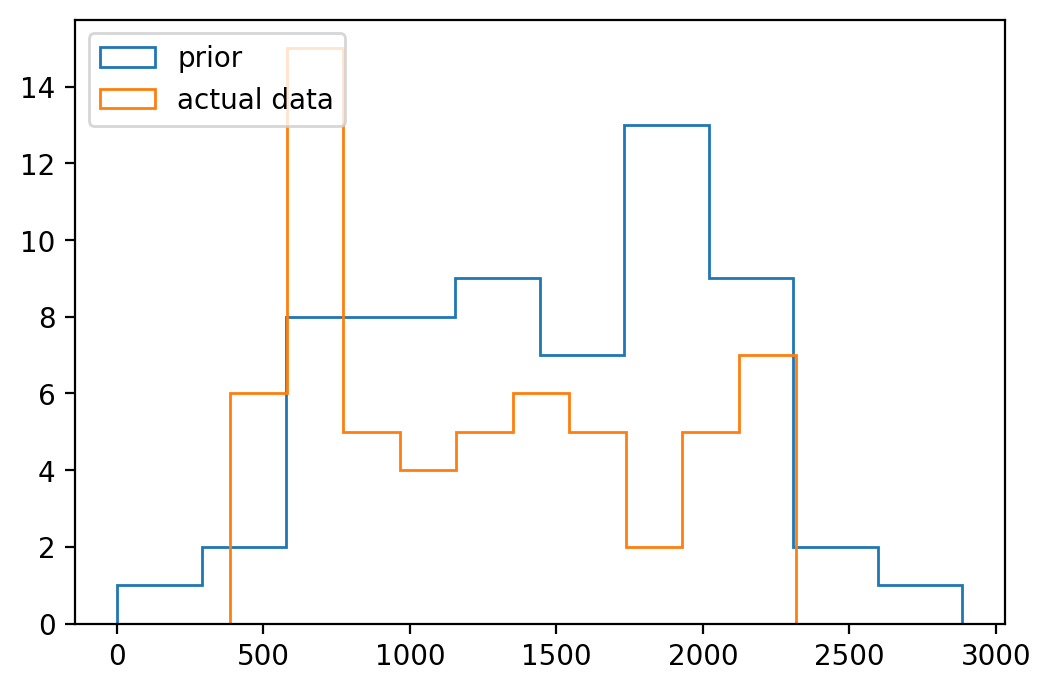

In [152]:
burglary_mean_ppc = np.mean(burglary_linear_pcc, axis = 1)
plt.hist(burglary_mean_ppc, bins=10, label= "prior", histtype='step')
plt.hist(california['Data.Rates.Property.Burglary'], bins=10, label= "actual data", histtype='step')
plt.legend(loc="upper left")
plt.show()

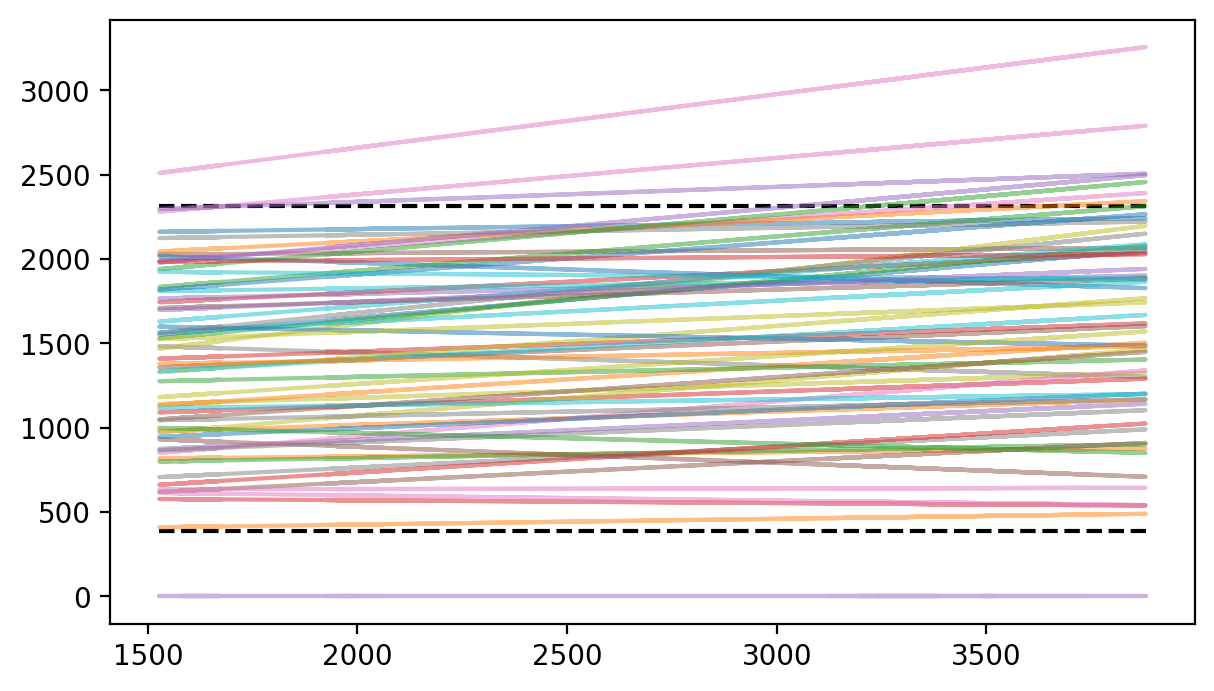

In [153]:
fig, axes = plt.subplots(1,1, figsize = (7,4))
axes.hlines([386, 2316], xmin = california['Data.Rates.Property.Larceny'].min(), xmax = california['Data.Rates.Property.Larceny'].max(), linestyle = '--', color = 'black')
for i in range(60):
    axes.plot(california['Data.Rates.Property.Larceny'], alpha_sim[i] + beta_sim[i]*california['Data.Rates.Property.Larceny'], alpha = 0.5)

# Linear model - posterior 

In [154]:
with open('linear_fit.stan', 'r') as file:
    print(file.read())

data {
   int N;
   vector[N] larceny;
   real burglaries[N];
}

parameters {
   real alpha;
   real beta;
   real <lower=0> sigma;
}

transformed parameters {
   vector[N] mu = larceny*beta+alpha;
}

model {
   alpha ~ normal(1275, 600);
   beta ~ normal(0.1, 0.075);
   sigma ~ exponential(0.005);
   burglaries ~ normal(mu, sigma);
}

generated quantities {
   array [N] real burglary;
   vector[N] log_lik;
   for (i in 1:N) {
       burglary[i] = normal_rng(mu[i], sigma);
       log_lik[i] = normal_lpdf(burglaries[i] | mu, sigma);
   }
}


In [155]:
linear_fit_model = CmdStanModel(stan_file = 'linear_fit.stan')
stan_data={'N': len(california["Data.Rates.Property.Larceny"]), "larceny": california["Data.Rates.Property.Larceny"], "burglaries": california["Data.Rates.Property.Burglary"] }

R = 1000 #bc the data has been collected for 60 years
sim_linear_fit = linear_fit_model.sample(data=stan_data, iter_sampling = R, 
                             iter_warmup = 1000,
                             chains = 4,
                             seed = 31052022) #from_cdmstanpy
alpha_fit = sim_linear_fit.stan_variable('alpha')
beta_fit = sim_linear_fit.stan_variable('beta')
# mu_sim = sim.stan_variable('mu')
sigma_fit = sim_linear_fit.stan_variable('sigma')
burglary_linear_fit = sim_linear_fit.stan_variable('burglary')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)
chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)

chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)





chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)
chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:01 Iteration: 1900 / 2000 [ 95%]  (Sampling)






chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                     


INFO:cmdstanpy:CmdStan done processing.


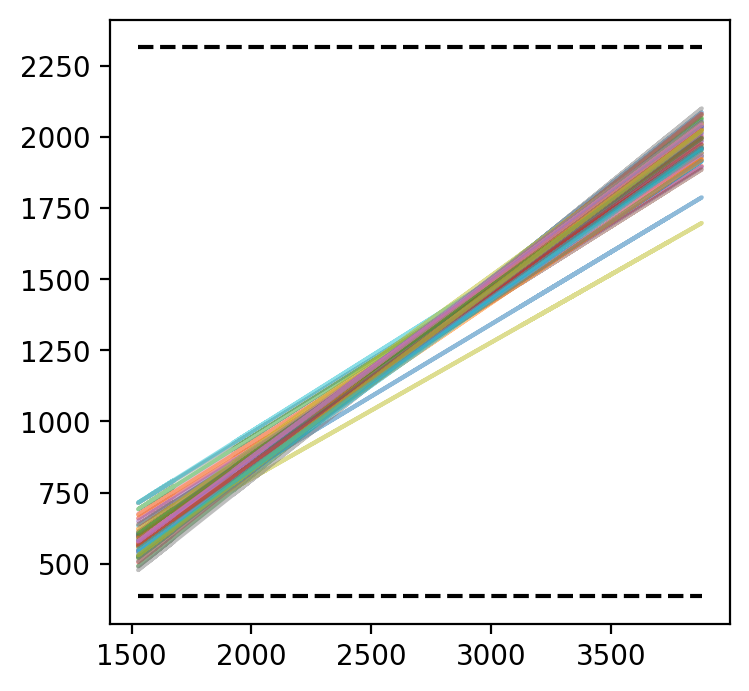

In [156]:
fig, axes = plt.subplots(1,1, figsize = (4,4))
axes.hlines([386, 2316], xmin = california['Data.Rates.Property.Larceny'].min(), xmax = california['Data.Rates.Property.Larceny'].max(), linestyle = '--', color = 'black')
for i in range(60):
    axes.plot(california['Data.Rates.Property.Larceny'], alpha_fit[i] + beta_fit[i]*california['Data.Rates.Property.Larceny'], alpha = 0.5)

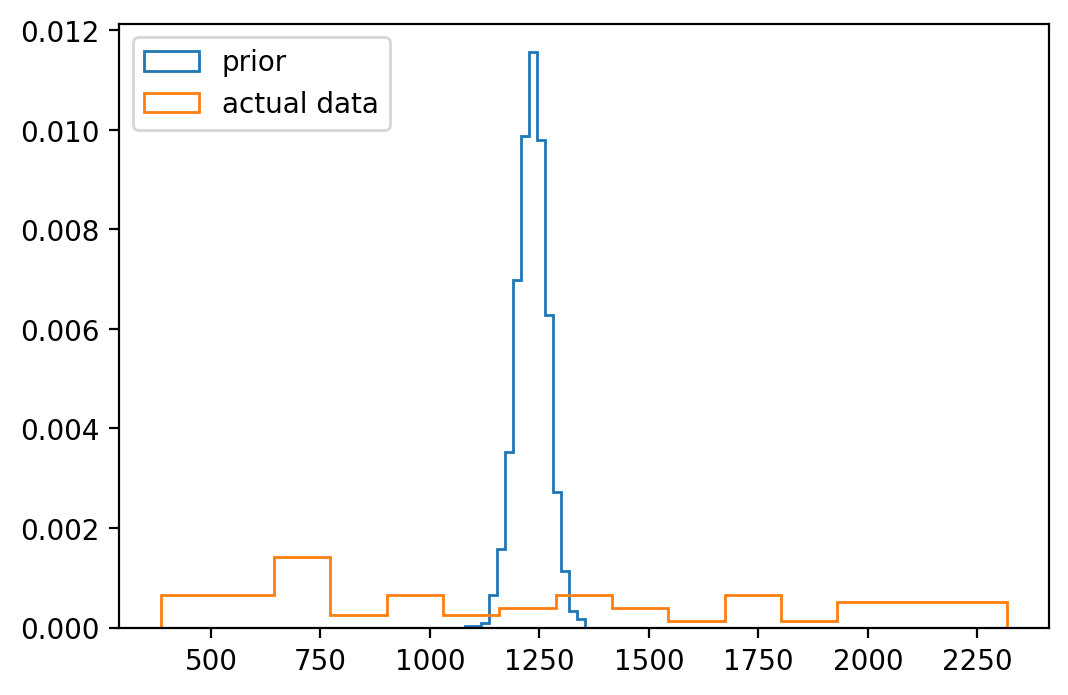

In [157]:
burglary_mean_fit = np.mean(burglary_linear_fit, axis=1)
plt.hist(burglary_mean_fit, bins=15, label= "prior", histtype='step', density = True)
plt.hist(california['Data.Rates.Property.Burglary'], bins=15, label= "actual data", histtype='step', density = True)
plt.legend(loc="upper left")
plt.show()

## MODEL COMPARISON

In [158]:
# log_lik is not properly specified

compare_dict = {'Normal': sim_normal_fit,'Linear': sim_linear_fit}
model_compare_waic = az.compare(compare_dict, ic = 'waic')
#from_inferencedata - trzeba odpowiednią nazwę
print(model_compare_waic.head())
az.plot_compare(model_compare_waic)
plt.title('WAIC comparision')

#różnica między waic i loo -> robi to samo - jak dobrze model działa poza zbiorem danych dostępnych do uczenia/waic-> porównuje dopasowanie modelu i estymuje,
#loo - ały zbiór danych - wyrzucamy jedną próbkę - uczenie modelu bez jednej próbki (i sprawdzamy jak dobrze dla jednej próbki)
#

TypeError: Encountered error trying to compute waic from model Normal.

In [ ]:
model_compare_loo = az.compare(compare_dict, ic="loo", method="stacking", scale="log")

print(model_compare_loo.head())
az.plot_compare(model_compare_loo)
plt.title('LOO comparison')